# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = 'drive/MyDrive/Data_analitic/Python/Pandas_Python/yulu_rental.csv'
df = pd.read_csv(data_path)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


In [20]:
df['count'].agg(['min', 'max', 'mean', 'std'])

,count
min,1.000000
max,977.000000
mean,191.574132
std,181.144454


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

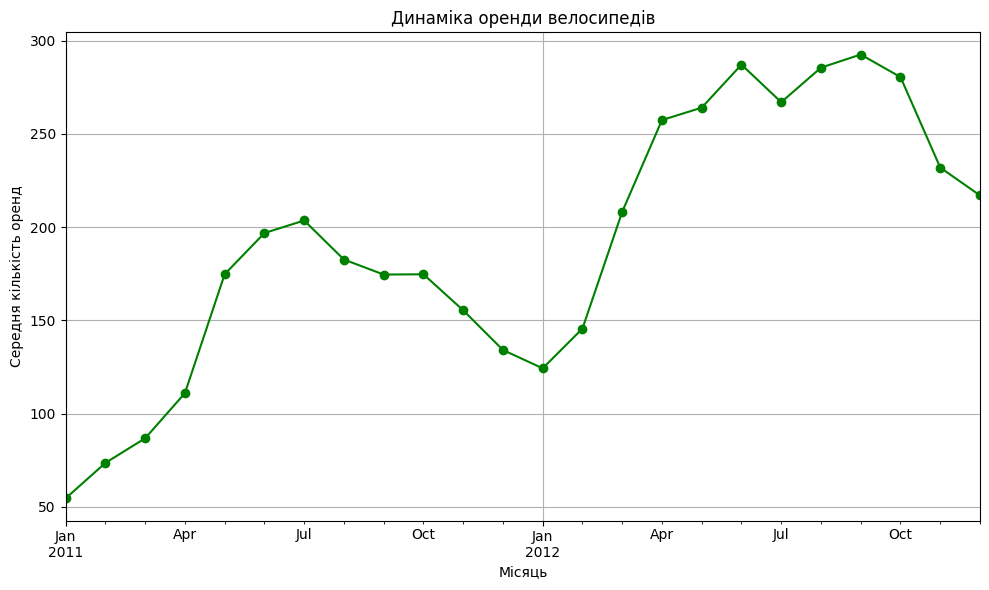

In [ ]:
month_g = df['count'].resample('ME').mean()

month_g.plot(
    kind='line',
    marker='o',
    color='green',
    figsize=(10, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)

plt.tight_layout()
plt.show()

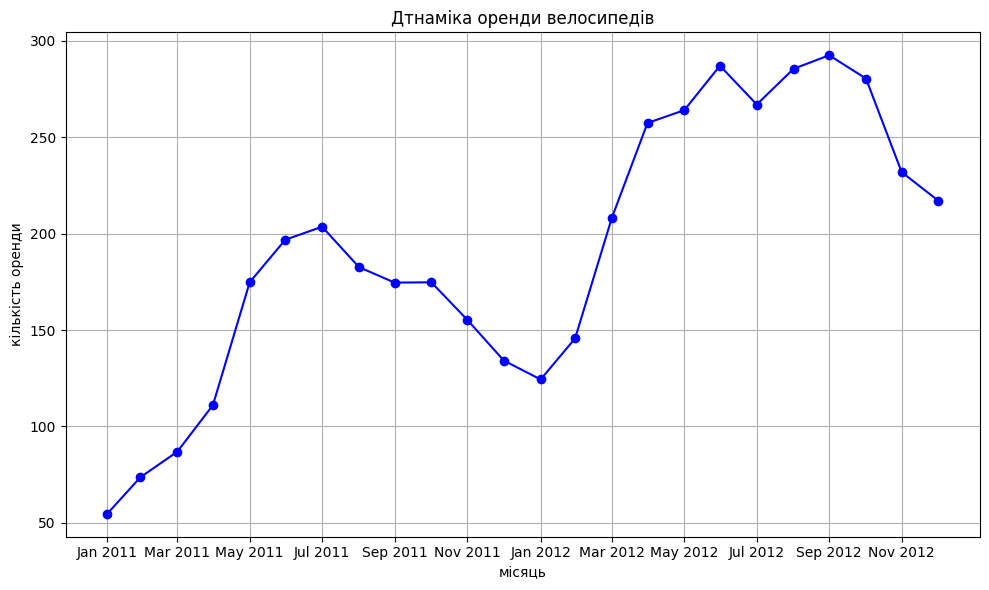

In [ ]:
month_g = df['count'].resample('ME').mean()


plt.figure(figsize=(10, 6))
plt.plot(month_g.index, month_g.values, marker='o', color='blue')

plt.title('Дтнаміка оренди велосипедів')
plt.xlabel('місяць')
plt.ylabel('кількість оренди')
plt.grid(True)
ticks_to_use = month_g.index[::2]

labels = [date.strftime('%b %Y') for date in ticks_to_use]

plt.xticks(ticks=ticks_to_use, labels=labels)
plt.tight_layout()
plt.show()

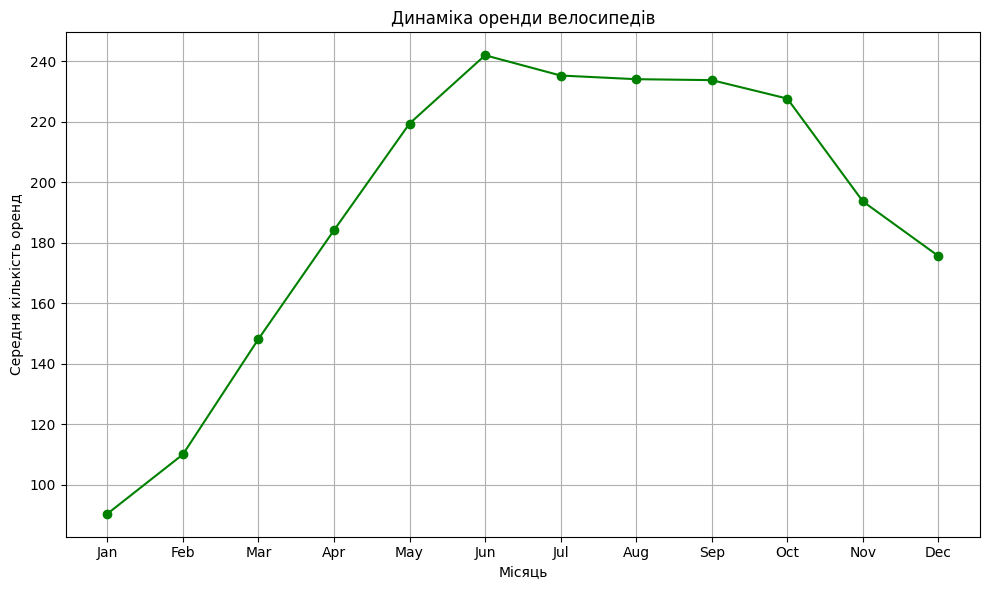

In [ ]:
month_g = df.groupby('month')['count'].mean()
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_g.index = label_months

month_g.plot(
    kind='line',
    marker='o',
    color='green',
    figsize=(10, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)
plt.xticks(ticks=range(0, 12), labels=label_months)
plt.tight_layout()
plt.show()

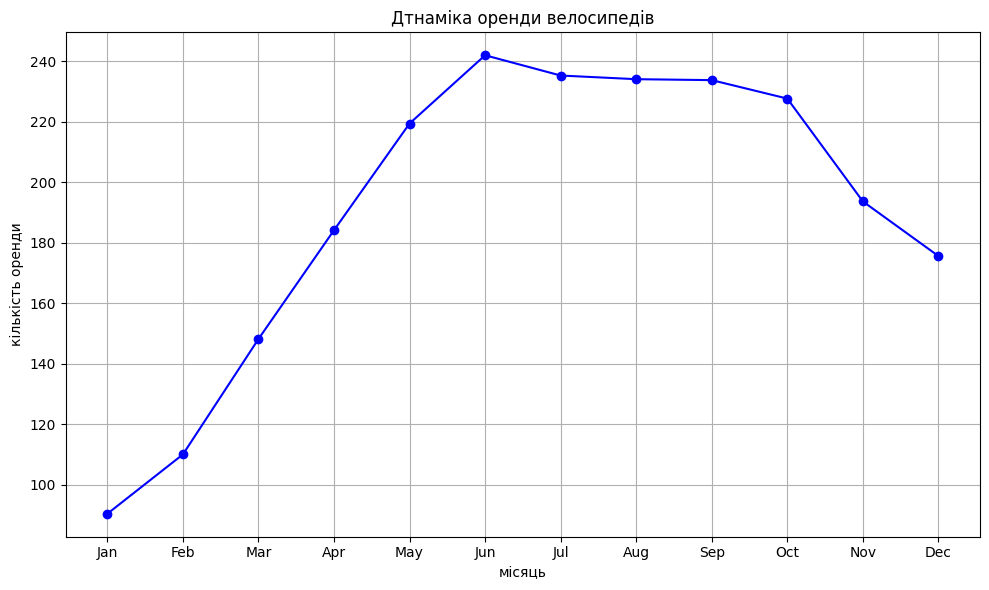

In [ ]:
month_g = df.groupby('month')['count'].mean()
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_g.index = label_months

plt.figure(figsize=(10, 6))
plt.plot(month_g.index, month_g.values, marker='o', color='blue')

plt.title('Дтнаміка оренди велосипедів')
plt.xlabel('місяць')
plt.ylabel('кількість оренди')
plt.grid(True)
plt.tight_layout()
plt.show()


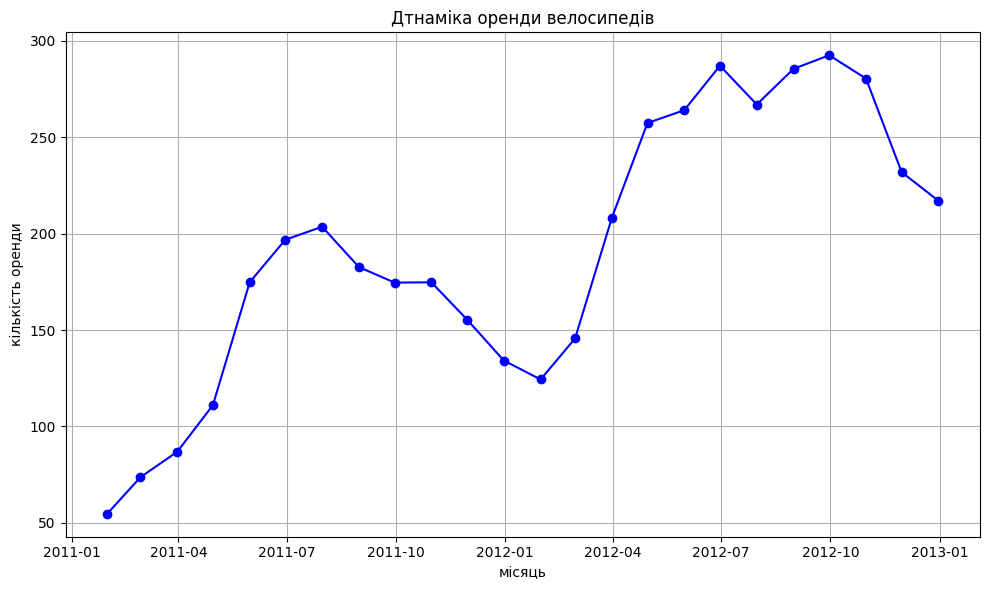

In [23]:
month_g = df['count'].resample('ME').mean()


plt.figure(figsize=(10, 6))
plt.plot(month_g.index, month_g.values, marker='o', color='blue')

plt.title('Дтнаміка оренди велосипедів')
plt.xlabel('місяць')
plt.ylabel('кількість оренди')
plt.grid(True)
plt.tight_layout()
plt.show()

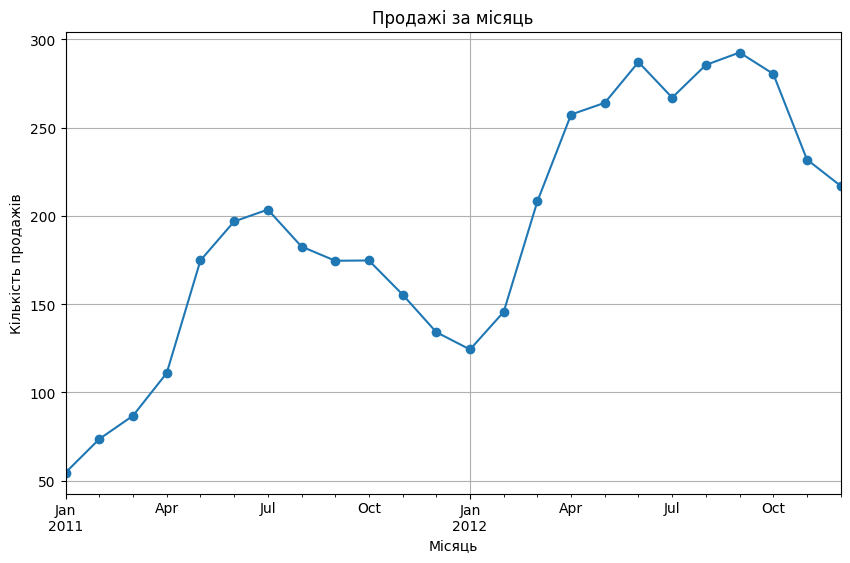

In [24]:
month_g.plot(
    marker='o',
    figsize=(10, 6),
    title='Продажі за місяць',
    xlabel='Місяць',
    ylabel='Кількість продажів',
    grid=True
);

1. Побудова середньої оренди через resample() (помісячно з урахуванням дати):

Pandas.plot()
- Зручніший і швидший спосіб, автоматично додає вертикальні роздільники між роками, графік більш читабельний, особливо коли даних багато (декілька років),менше коду - швидше зробити.Але, ніби обрізає графік і початкові та кінцеві точки графіку лежать на рамці графіка.

- Matplotlib
потрібно вручну налаштовувати підписи, вісі, розмітку, менш зручний для тривалих часових рядів, більше коду, більше шансів помилок.

2. Побудова середньої оренди по місяцях без розбиття на роки (агрегування по місяцях): якщо зробити однакові налаштування, графіки Pandas.plot() і Matplotlib дуже схожі, різниця в коді - Pandas зручніший, але Matplotlib дає більше контролю візуально результати майже не відрізняються.

Висновок:
для аналізу помісячних змін у часі з даними за кілька років - краще Pandas .plot(), бо це швидко, зручно і читабельно.
Для агрегації по місяцях без урахування року можна використовувати обидна способи.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [5]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

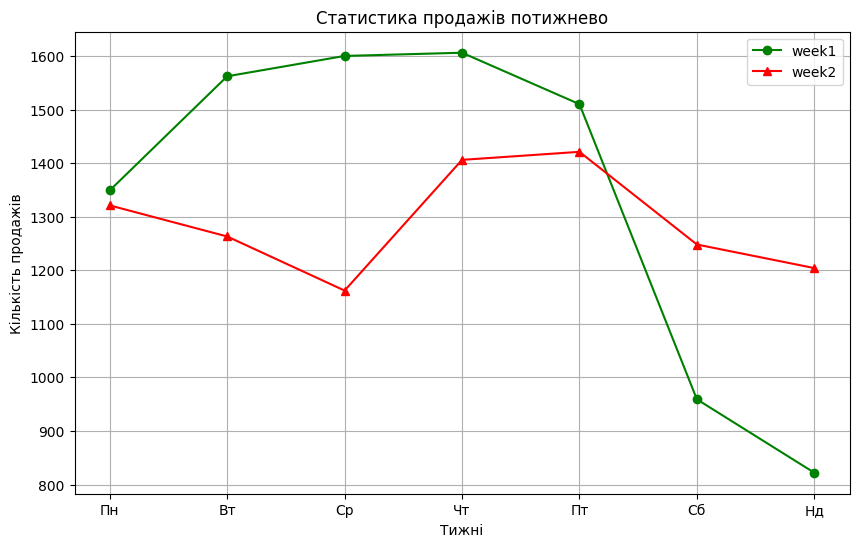

In [42]:
day_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']
plt.figure(figsize=(10, 6))
plt.plot(sales_week1, marker='o', color='green', label='week1')
plt.plot(sales_week2, marker='^', color='red', label='week2')

plt.xticks(ticks=days, labels=day_labels)

plt.title('Статистика продажів потижнево')
plt.xlabel('Тижні')
plt.ylabel('Кількість продажів')
plt.grid(True)
plt.legend()
plt.show()


In [34]:
mean_val_1 = np.mean(sales_week1).round(2)
max_val_1 = np.max(sales_week1)
min_val_1 = np.min(sales_week1)

mean_val_2 = np.mean(sales_week2).round(2)
max_val_2= np.max(sales_week2)
min_val_2 = np.min(sales_week2)

print(f'Mean: {mean_val_1}, {mean_val_2}')
print(f'Max: {max_val_1}, {max_val_2}')
print(f'Min: {min_val_1}, {min_val_2}')

Mean: 1344.0, 1289.29
Max: 1606, 1421
Min: 822, 1162


In [35]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f'Standard deviation Week 1: {std_week1:.2f}')
print(f'Standard deviation Week 2: {std_week2:.2f}')

Standard deviation Week 1: 300.00
Standard deviation Week 2: 90.91


Аналіз продажів за два тижні показав, що продажі другого тижня були більш стабільними порівняно з першим. Це підтверджують як візуальні спостереження за графіком, так і числові показники - мінімальні та максимальні значення продажів, а також стандартне відхилення.

У першому тижні спостерігається велика різниця між мінімальними (822) і максимальними (1606) продажами, а стандартне відхилення становить 300, що свідчить про значні коливання. Можливо, це пов’язано з акційними пропозиціями або іншими факторами, що стимулювали підвищені продажі у будні, але призвели до спадів у вихідні.

Другий тиждень характеризується меншими коливаннями: мінімум 1162, максимум 1421 та стандартне відхилення лише 90.91. Це говорить про більш рівномірний розподіл продажів протягом тижня, що може бути результатом стабілізації попиту та звикання покупців до товару.

Чому так може бути?
- у першому тижні, можливо, були акційні пропозиції з понеділка по п’ятницю, що збільшило продажі у будні, але у вихідні (особливо неділю) спостерігався спад.
- у другому тижні продажі більш рівномірні, оскільки покупці звикли до товару і купують його стабільно протягом тижня.
- загальна тенденція — зниження продажів у суботу і більші продажі у неділю — можливо, це пов’язано з характером товару, який менш потрібен у вихідні.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [6]:
temp_mean = df.groupby('month')['temp'].mean()
season_mean = df.groupby('season')['count'].mean()
humidity = df['humidity']
temp = df['temp']
count = df['count']

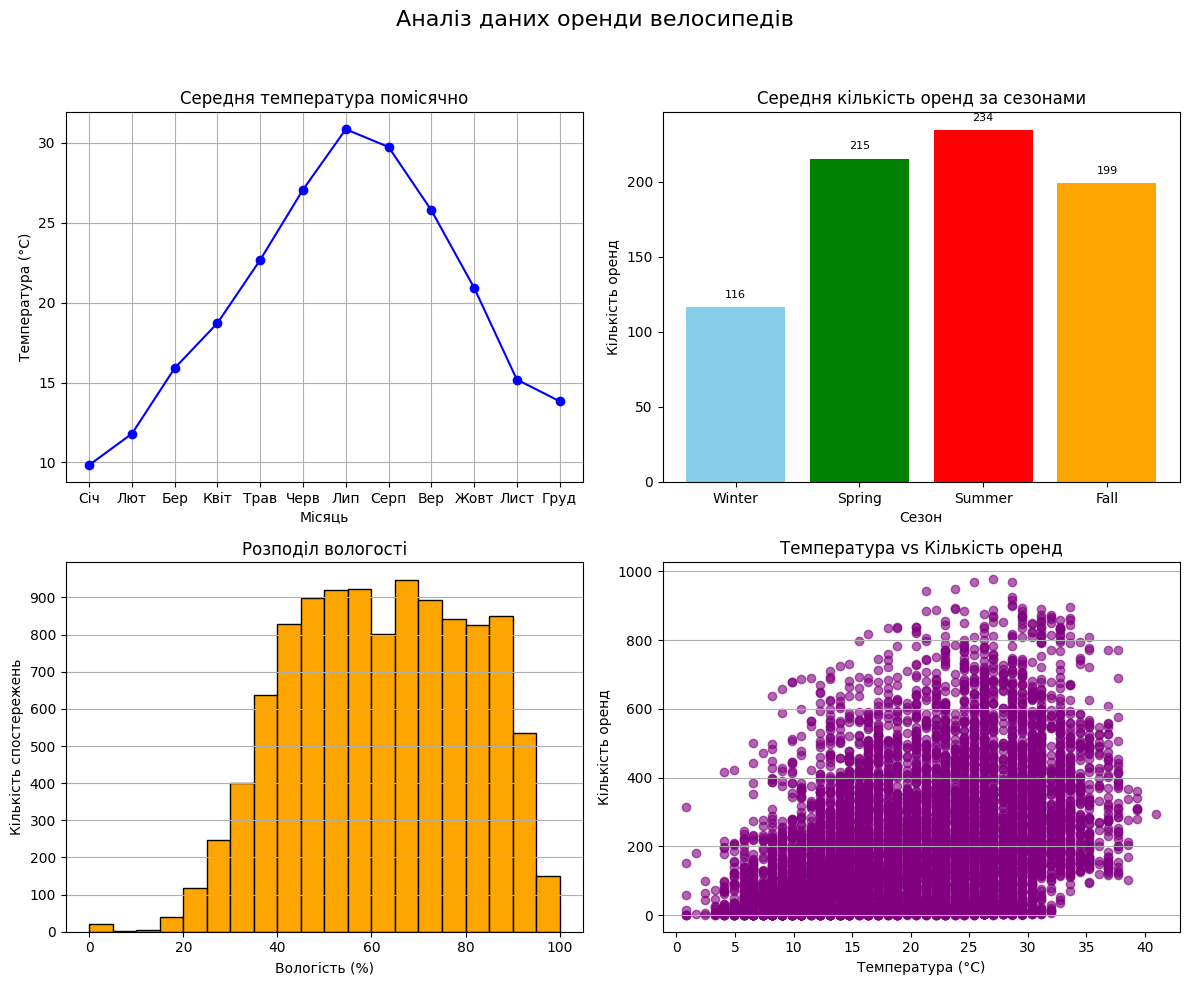

In [21]:
plt.figure(figsize=(12, 10))
plt.suptitle('Аналіз даних оренди велосипедів', fontsize=16)

plt.subplot(2, 2, 1)
month_labels = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
                'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']
plt.plot(temp_mean.index, temp_mean.values, marker='o', color='blue')
plt.xticks(ticks=range(1, 13), labels=month_labels)

plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.grid(True)

# 2. Стовпчикова діаграма: середня кількість оренд за сезонами
plt.subplot(2, 2, 2)
season_labels = {1:'Winter', 2: 'Spring', 3:'Summer', 4:'Fall'}
season_names = [season_labels[s] for s in season_mean.index]
season_colors = {
    1: 'skyblue',   # зима
    2: 'green',  # весна
    3: 'red',    # літо
    4: 'orange' # осінь
}
colors = [season_colors[s] for s in season_mean.index]
for i, value in enumerate(season_mean):
    plt.text(i, value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=8, fontweight='light')

plt.bar(season_names, season_mean.values, color=colors)
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity, bins=20, color='orange', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість спостережень')
plt.yticks(range(0, 1000, 100))
plt.grid(axis='y')

# 4. Scatter plot: температура vs кількість оренд
plt.subplot(2, 2, 4)
plt.scatter(temp, count, alpha=0.6, color='purple')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.grid(axis='y')

# Щоб заголовок dashboard не перекривав графіки
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

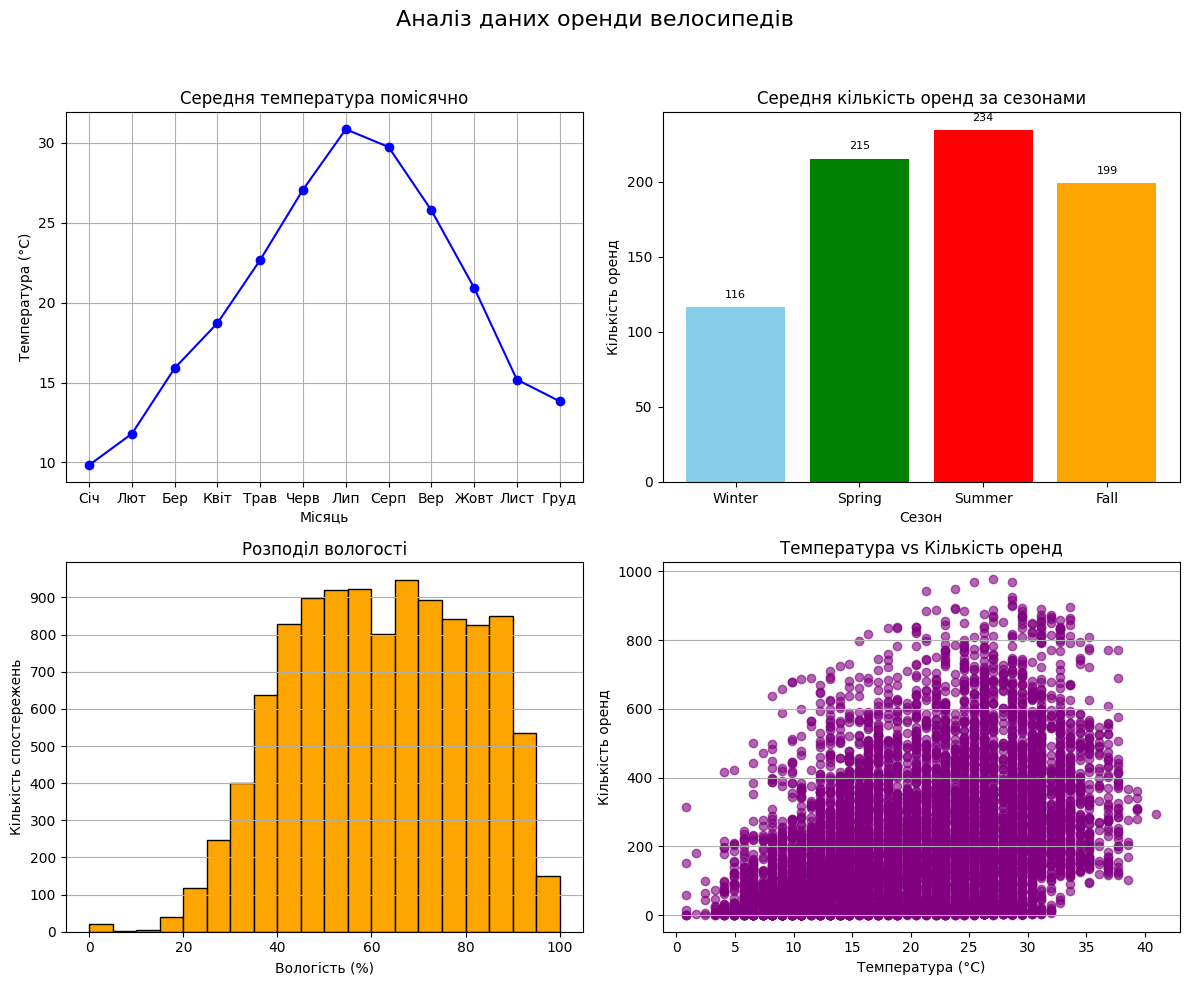

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle('Аналіз даних оренди велосипедів', fontsize=16)

month_labels = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
                'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']
ax[0, 0].plot(temp_mean.index, temp_mean.values, marker='o', color='blue')
ax[0, 0].set_xticks(ticks=range(1, 13), labels=month_labels)
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура (°C)')
ax[0, 0].grid(True)

season_labels = {1:'Winter', 2: 'Spring', 3:'Summer', 4:'Fall'}
season_names = [season_labels[s] for s in season_mean.index]
season_colors = {
    1: 'skyblue',   # зима
    2: 'green',  # весна
    3: 'red',    # літо
    4: 'orange' # осінь
}
colors = [season_colors[s] for s in season_mean.index]
for i, value in enumerate(season_mean):
    ax[0, 1].text(i, value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=8, fontweight='light')
ax[0, 1].bar(season_names, season_mean.values, color=colors)
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')

ax[1, 0].hist(humidity, bins=20, color='orange', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Кількість спостережень')
ax[1, 0].set_yticks(range(0, 1000, 100))
ax[1, 0].grid(axis='y')

ax[1, 1].scatter(temp, count, alpha=0.6, color='purple')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура (°C)')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(axis='y')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Обидва підходи - plt.subplot() та plt.subplots() - дозволяють створювати кілька графіків на одному полотні. На перший погляд, вони дуже схожі за функціоналом, адже в обох випадках можна налаштувати кожен графік окремо: додати сітку, змінити кольори, підписи осей, заголовки тощо.

На практиці plt.subplot() виглядає простішим у синтаксисі: для кожного графіка достатньо викликати plt.subplot(2, 2, 1) і надалі просто використовувати plt.xlabel(), plt.title() тощо — без потреби в додаткових змінних. Це зручно, коли графіків небагато і зміни нечасті.

Водночас, plt.subplots() є більш гнучким та масштабованим. Він створює масив об’єктів осей (ax), до яких можна звертатися окремо, наприклад: ax[0, 0].set_title() або ax[1, 1].grid(True). Це особливо корисно, коли графіків багато (наприклад, 10 або 100), або коли потрібно централізовано змінити певні властивості (наприклад, усі назви осей чи стилі сітки). В такому випадку можна пройтись циклом по ax.flat — і це значно ефективніше, ніж шукати в коді кожен виклик plt.subplot() вручну.

Підсумовуючи, обидва підходи працюють добре, але мають свої переваги залежно від завдання. Для простих дашбордів (до 4 графіків) зручно використовувати plt.subplot(). Для масштабних або часто змінюваних візуалізацій - краще підходить plt.subplots(), який дає більше контролю над кодом для змін, коректування.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [10]:
import matplotlib.dates as mdates

In [14]:
rentals_monthly_stats=df['count'].resample('ME').agg(['mean', 'max', 'min'])
std = rentals_monthly_stats["mean"].std()

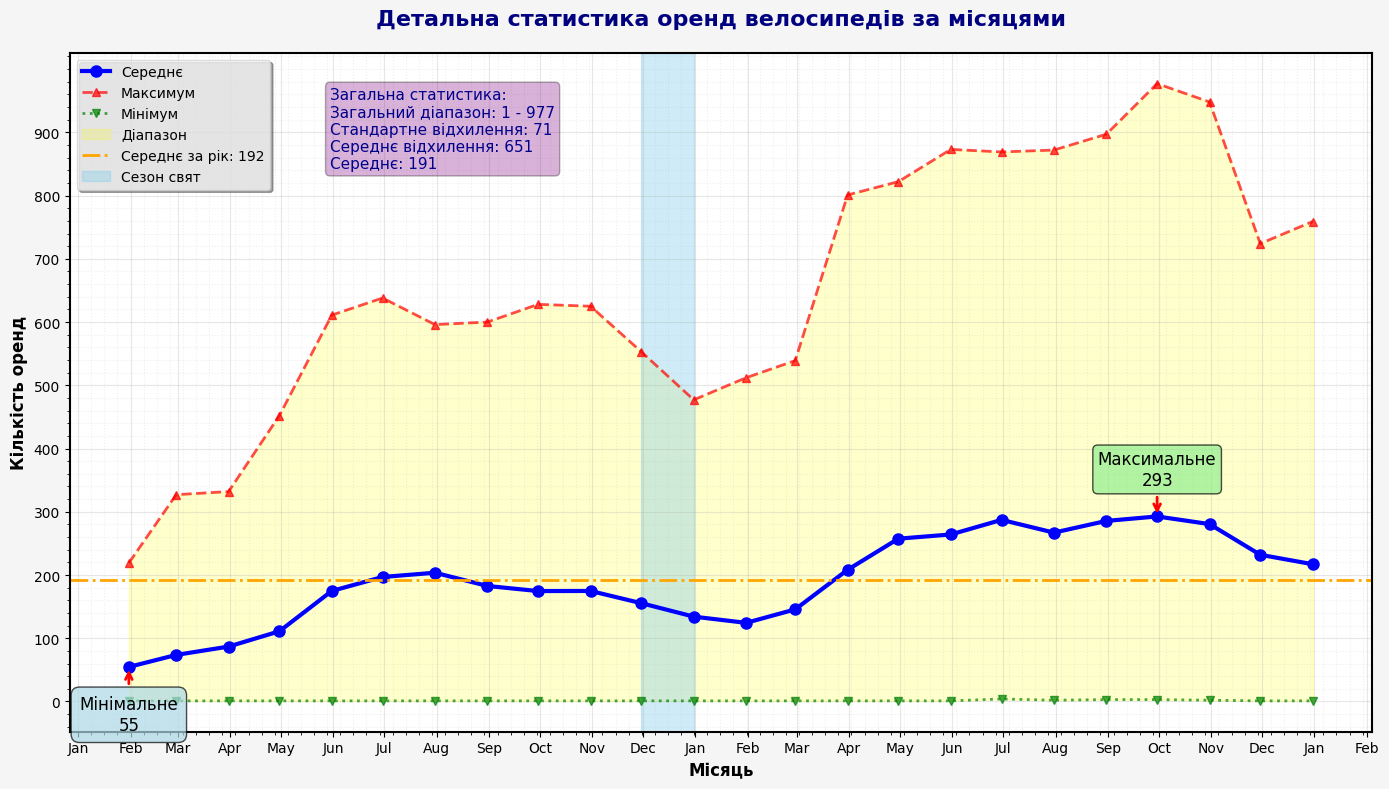

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('whitesmoke')

# Малюємо лінії з різними стилями
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['max'], 'r--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['min'], 'g:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)


# Заливка між max та min (правильний синтаксис)
ax.fill_between(rentals_monthly_stats.index, rentals_monthly_stats['min'], rentals_monthly_stats['max'],
                alpha=0.2, color='Yellow', label='Діапазон')

# Анотація для максимального середнього значення
max_idx_month = rentals_monthly_stats['mean'].idxmax()
max_val = rentals_monthly_stats['mean'].max()
ax.annotate(f'Максимальне\n{max_val:.0f}',
            xy=(max_idx_month, max_val), xytext=(max_idx_month, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

# Анотація для мінімального середнього значення
min_idx_month = rentals_monthly_stats['mean'].idxmin()
min_val = rentals_monthly_stats['mean'].min()
ax.annotate(f'Мінімальне\n{min_val:.0f}',
            xy=(min_idx_month, min_val), xytext=(min_idx_month, min_val - 100),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=12, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')
ax.set_yticks(range(0, 1000, 100))
ax.set_xticks(ticks=range(0, 12))
ax.set_xticklabels(labels=label_months)
ax.set_title('Детальна статистика оренд велосипедів за місяцями',fontsize=16, family='sans-serif', fontweight='bold', color='navy', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='Orange', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

# Виділяємо зони (листопад-грудень)
if len(rentals_monthly_stats) >= 12:
    ax.axvspan(rentals_monthly_stats.index[10], rentals_monthly_stats.index[11], alpha=0.4,
               color='skyblue', label='Сезон свят')

# Покращуємо легенду
ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True,
          fancybox=True, framealpha=0.7)

# Додаємо текст з додатковою статистикою
textstr = f'Загальна статистика:\n'
textstr += f'Загальний діапазон: {rentals_monthly_stats["min"].min():.0f} - {rentals_monthly_stats["max"].max():.0f}\n'
textstr += f'Стандартне відхилення: {std:.0f}\n'
textstr += f'Середнє відхилення: {(rentals_monthly_stats["max"] - rentals_monthly_stats["min"]).mean():.0f}\n'
textstr += f'Середнє: {rentals_monthly_stats["mean"].mean():.0f}'
props = dict(boxstyle='round', facecolor='Purple', alpha=0.3)
ax.text(0.2, 0.95, textstr, color='darkblue',transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

Перевага додавання анотацій на графік:
анотації дозволяють виділити важливі точки на графіку, наприклад, максимальні або мінімальні значення. Це допомагає одразу звернути увагу на ключові дані без необхідності шукати всі точки вручну. Робить графік більш зрозумілим та візуально інформативним.

Для чого використовується fill_between()?
fill_between() використовується для зафарбовування області між двома кривими, наприклад між мінімальними та максимальними значеннями. Це візуально виділяє діапазон змін або розкид даних, даючи швидке уявлення про варіативність показників.

Як текстовий блок допомагає в інтерпретації даних?
Текстовий блок на графіку містить ключові статистичні показники, такі як середнє, мінімум, максимум або стандартне відхилення. Це дозволяє швидко орієнтуватися у загальній картині без необхідності заглиблюватись у детальний аналіз, підвищуючи ефективність сприйняття інформації.

In [43]:
rentals_monthly_stats = df.groupby('month')['count'].agg(['mean', 'max', 'min'])
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rentals_monthly_stats.index = label_months

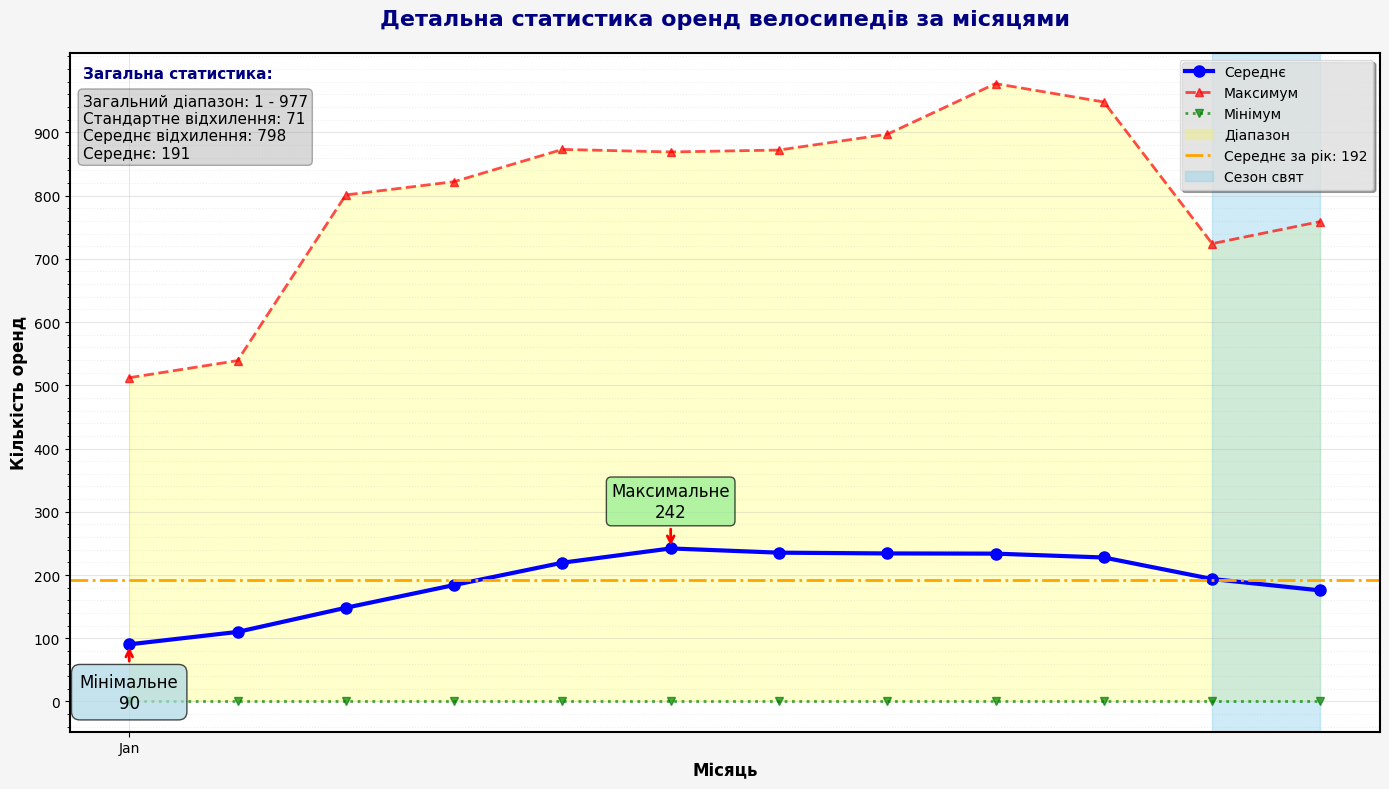

In [45]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('whitesmoke')

# Малюємо лінії з різними стилями
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['max'], 'r--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(rentals_monthly_stats.index, rentals_monthly_stats['min'], 'g:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)


# Заливка між max та min (правильний синтаксис)
ax.fill_between(rentals_monthly_stats.index, rentals_monthly_stats['min'], rentals_monthly_stats['max'],
                alpha=0.2, color='Yellow', label='Діапазон')

# Анотація для максимального середнього значення
max_idx_month = rentals_monthly_stats['mean'].idxmax()
max_val = rentals_monthly_stats['mean'].max()
ax.annotate(f'Максимальне\n{max_val:.0f}',
            xy=(max_idx_month, max_val), xytext=(max_idx_month, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

# Анотація для мінімального середнього значення
min_idx_month = rentals_monthly_stats['mean'].idxmin()
min_val = rentals_monthly_stats['mean'].min()
ax.annotate(f'Мінімальне\n{min_val:.0f}',
            xy=(min_idx_month, min_val), xytext=(min_idx_month, min_val - 100),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=12, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')
ax.set_yticks(range(0, 1000, 100))
ax.set_xticks(range(len(rentals_monthly_stats)))  # від 0 до 11
ax.set_xticklabels(rentals_monthly_stats.index)
ax.set_title('Детальна статистика оренд велосипедів за місяцями',fontsize=16, family='sans-serif', fontweight='bold', color='navy', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='Orange', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

# Виділяємо зони (листопад-грудень)
if len(rentals_monthly_stats) >= 12:
    ax.axvspan(rentals_monthly_stats.index[10], rentals_monthly_stats.index[11], alpha=0.4,
               color='skyblue', label='Сезон свят')

# Покращуємо легенду
ax.legend(loc='upper right', fontsize=10, frameon=True, shadow=True,
          fancybox=True, framealpha=0.7)

# Додаємо текст з додатковою статистикою
textstr = f'Загальний діапазон: {rentals_monthly_stats["min"].min():.0f} - {rentals_monthly_stats["max"].max():.0f}\n'
textstr += f'Стандартне відхилення: {std:.0f}\n'
textstr += f'Середнє відхилення: {(rentals_monthly_stats["max"] - rentals_monthly_stats["min"]).mean():.0f}\n'
textstr += f'Середнє: {rentals_monthly_stats["mean"].mean():.0f}'
props = dict(boxstyle='round', facecolor='grey', alpha=0.3)
ax.text(0.01, 0.94, textstr, color='black',transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
ax.text(0.01, 0.98, 'Загальна статистика:', transform=ax.transAxes,
        fontsize=11, fontweight='bold', color='navy', verticalalignment='top')
# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

Не змогла адекватно відобразити назви місяів на осі ОХ. Підкажіть якто правильно зробити. Буду вдячна